# SciPy Library
---
<br>
SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
SciPy is organized into sub-packages that cover different scientific computing domains. In this SciPy Tutorial, we shall learn all the modules and the routines/algorithms they provide.

### SciPy installation

```bash
pip3 install scipy
```

### Basic math 
- linespace

In [12]:
import numpy as np
print (np.linspace(1., 4., 6))

[1.  1.6 2.2 2.8 3.4 4. ]


- defining matrix and its transpose

In [13]:
import numpy as np
mat = np.matrix('1 2; 3 4')
mat.T

matrix([[1, 3],
        [2, 4]])

- Constents in maths

In [14]:
from scipy.constants import pi
print("value of pi: ", pi)

value of pi:  3.141592653589793


- more such values and the symboles can be seen here
https://docs.scipy.org/doc/scipy/reference/constants.html

## Fast Fourier Transform Pack
---
- **fft**
![image.png](https://www.gamasutra.com/db_area/images/feature/3993/fig2.jpg)

In [19]:
from scipy.fftpack import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

y

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

- **ifft**

In [20]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

- Plot of sin wave fft

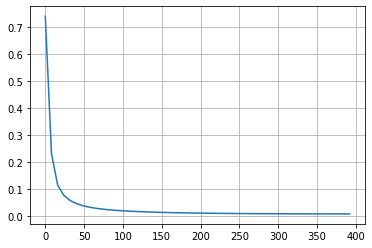

In [31]:
from scipy.fftpack import fft, fftfreq

N = 100
# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(2.0*np.pi*x) 

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### N-D discrete Fourier transforms

- The functions fft2 and ifft2 provide 2-D FFT and IFFT, respectively. Similarly, fftn and ifftn provide N-D FFT, and IFFT, respectively.For real-input signals, similarly to rfft, we have the functions rfft2 and irfft2 for 2-D real transforms; rfftn and irfftn for N-D real transforms.
- The example below demonstrates a 2-D IFFT and plots the resulting (2-D) time-domain signals.

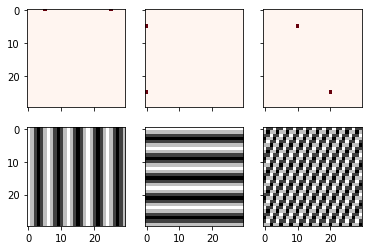

In [34]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1

Z = ifftn(xf)

ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1

Z = ifftn(xf)

ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1

Z = ifftn(xf)

ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

## Integrate

- Interpolation types and their names cam be find here https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

- $$ \int_{a}^{b} f(x)dx$$

- $f(x) = e^{-x^2}$ 
- There are two values in output, in which the first number is the value of integral and the second value is the estimate of the absolute error in the value of integral.

In [35]:
import scipy.integrate
from numpy import exp

f= lambda x:exp(-x**2)
a = 0
b = 1

i = scipy.integrate.quad(f, a, b)    #(function, lowerlimit, upperlimit)

print (i)

(0.7468241328124271, 8.291413475940725e-15)


### Double integrals
- $$\int_{0}^{1/2} dy \int_{0}^{\sqrt{1-4y^2}} 16xy \:dx$$



In [37]:
import scipy.integrate
from numpy import exp
from math import sqrt

f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)

i = scipy.integrate.dblquad(f, 0, 0.5, g, h)    # (func, a, b, gfun, hfun)

print (i)

(0.5, 1.7092350012594845e-14)


## Interpolation
- Interpolation is the process of finding a value between two points on a line or a curve.
- below is the example with random sampled cos curve

In [42]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)

print(x)
print(y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ]
[-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


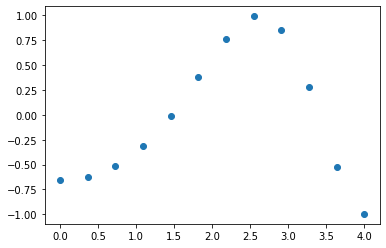

In [44]:
plt.plot(x, y,'o')
plt.show()

### 1-D Interpolation
- By using the above data, let us create a interpolate function and draw a new interpolated graph.
- Below are two methods we will use in 1D inaterpolation 

In [46]:
from scipy.interpolate import interp1d

f1 = interp1d(x, y,kind = 'linear')

f2 = interp1d(x, y, kind = 'cubic')

- Best fit graph using above two methods 

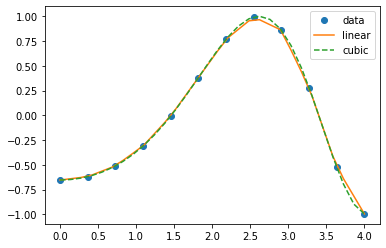

In [52]:
xnew = np.linspace(0, 4,30)

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')

plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')

plt.show()

## SciPy Cluster Module
---
- Clustering is the process of organizing objects into groups whose members are similar in some way.
- Making a raw data to apply our k-mean algorithm 

**K-Means**

shpae of data: (60, 2)
[1.70379432 1.65104079]


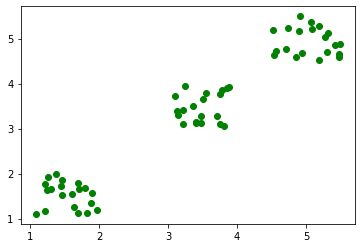

In [6]:
from numpy import vstack,array
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import kmeans,vq,whiten
  
data = vstack(((rand(20,2)+1),(rand(20,2)+3),(rand(20,2)+4.5)))
print('shpae of data:', data.shape)
print(data[0])
  
plt.plot(data[:,0],data[:,1],'go')
plt.show()

- Getting the results from K-Mean algorthm and printing the centroid value

centroids  :  [[3.44603487 3.46217629]
 [2.37994402 2.43293851]
 [1.04628672 1.07368297]]
distortion : 0.26712575971674263


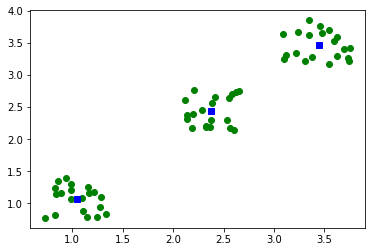

In [54]:
data = whiten(data)
 
# find 3 clusters in the data
centroids,distortion = kmeans(data,3)
 
print('centroids  : ',centroids)
print('distortion :',distortion)

plt.plot(data[:,0],data[:,1],'go',centroids[:,0],centroids[:,1],'bs')

plt.show()


## Linear Equations
- The scipy.linalg.solve feature solves the linear equation a * x + b * y = Z, for the unknown x, y values.
- equations 
    - x + 3y + 5z = 10
    - 2x + 5y + z = 8
    - 2x + 3y + 8z = 3
    
- $$\begin{bmatrix} x\\ y\\ z \end{bmatrix} = \begin{bmatrix} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8 \end{bmatrix}^{-1} \begin{bmatrix} 10\\ 8\\ 3 \end{bmatrix} = \frac{1}{25} \begin{bmatrix} -232\\ 129\\ 19 \end{bmatrix} = \begin{bmatrix} -9.28\\ 5.16\\ 0.76 \end{bmatrix}.$$

In [57]:
from scipy import linalg
import numpy as np

# D matrix
a = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
b = np.array([10, 8, 3])

#Passing the values to the solve function
x = linalg.solve(a, b)

print (x)

[-9.28  5.16  0.76]


### Eigenvalues and Eigenvectors
- The eigenvalue-eigenvector problem is one of the most commonly employed linear algebra operations. We can find the Eigen values (λ) and the corresponding Eigen vectors (v) of a square matrix (A) by considering the following relation −

- Av = λv



In [59]:
from scipy import linalg
import numpy as np


A = np.array([[1,2],[3,4]])   # matrix

l, v = linalg.eig(A) 

print("Eigen Value", l)
print("Eigen Vector", v)


Eigen Value [-0.37228132+0.j  5.37228132+0.j]
Eigen Vector [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


## frequently used special functions
- #### Cubic Root Function

In [66]:
from scipy.special import cbrt
res = cbrt([10, 9, 0.1254, 27, 512, 729])
print (res)

[2.15443469 2.08008382 0.50053277 3.         8.         9.        ]


- **Exponential Function**


In [68]:
from scipy.special import exp10
res = exp10([2, 9])
print (res)

[1.e+02 1.e+09]


- #### Lambert Function
    W(z) is such that z = W(z) * exp(W(z)) for any complex number z.

In [70]:
from scipy.special import lambertw
w = lambertw(1)
print (w)
w * np.exp(w)

(0.5671432904097838+0j)


(1+0j)

- #### Gamma Function
    z*gamma(z) = gamma(z+1) and gamma(n+1) = n!, for a natural number ‘n’.

In [71]:
from scipy.special import gamma
res = gamma([0, 0.5, 1, 5])
res

array([        inf,  1.77245385,  1.        , 24.        ])